In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                           recall_score, f1_score, classification_report)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load preprocessed data
train_data = pd.read_csv('titanic_train_cleaned.csv')
test_data = pd.read_csv('titanic_test_cleaned.csv')

# Prepare features and target
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

In [5]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1, random_state=42)

In [6]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [7]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("="*60)
print("TITANIC SURVIVAL PREDICTION - CONFUSION MATRIX ANALYSIS")
print("="*60)

print(f"\nDataset Info:")
print(f"Test samples: {len(y_test)}")
print(f"Actual survivors: {y_test.sum()} ({y_test.mean():.1%})")
print(f"Actual non-survivors: {len(y_test) - y_test.sum()} ({1-y_test.mean():.1%})")

# Display confusion matrix values
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                No    Yes")
print(f"Actual   No    {tn:3d}   {fp:3d}")
print(f"         Yes   {fn:3d}   {tp:3d}")

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives  (TN): {tn:3d} - Correctly predicted NOT survived")
print(f"False Positives (FP): {fp:3d} - Incorrectly predicted survived")
print(f"False Negatives (FN): {fn:3d} - Incorrectly predicted NOT survived")
print(f"True Positives  (TP): {tp:3d} - Correctly predicted survived")


TITANIC SURVIVAL PREDICTION - CONFUSION MATRIX ANALYSIS

Dataset Info:
Test samples: 84
Actual survivors: 31 (36.9%)
Actual non-survivors: 53 (63.1%)

Confusion Matrix:
                 Predicted
                No    Yes
Actual   No     49     4
         Yes     0    31

Confusion Matrix Breakdown:
True Negatives  (TN):  49 - Correctly predicted NOT survived
False Positives (FP):   4 - Incorrectly predicted survived
False Negatives (FN):   0 - Incorrectly predicted NOT survived
True Positives  (TP):  31 - Correctly predicted survived


In [8]:
# Calculate and display metrics
print(f"\n" + "="*40)
print("PERFORMANCE METRICS")
print("="*40)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.1f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.1f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.1f}%)")



PERFORMANCE METRICS
Accuracy:  0.9524 (95.2%)
Precision: 0.8857 (88.6%)
Recall:    1.0000 (100.0%)
F1-Score:  0.9394 (93.9%)


In [9]:
# Explain what each metric means
print(f"\nMetric Explanations:")
print(f"• Accuracy:  {tp + tn}/{len(y_test)} = {accuracy:.3f} (Overall correct predictions)")
print(f"• Precision: {tp}/{tp + fp} = {precision:.3f} (Of predicted survivors, how many actually survived)")
print(f"• Recall:    {tp}/{tp + fn} = {recall:.3f} (Of actual survivors, how many we correctly identified)")
print(f"• F1-Score:  2 × (Precision × Recall)/(Precision + Recall) = {f1:.3f} (Balanced measure)")


Metric Explanations:
• Accuracy:  80/84 = 0.952 (Overall correct predictions)
• Precision: 31/35 = 0.886 (Of predicted survivors, how many actually survived)
• Recall:    31/31 = 1.000 (Of actual survivors, how many we correctly identified)
• F1-Score:  2 × (Precision × Recall)/(Precision + Recall) = 0.939 (Balanced measure)


In [10]:
# Visualize confusion matrix
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

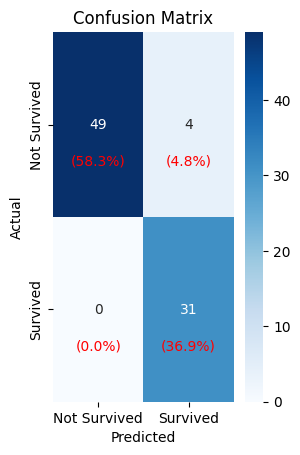

In [11]:
# Confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Add percentage annotations
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / len(y_test) * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='red')

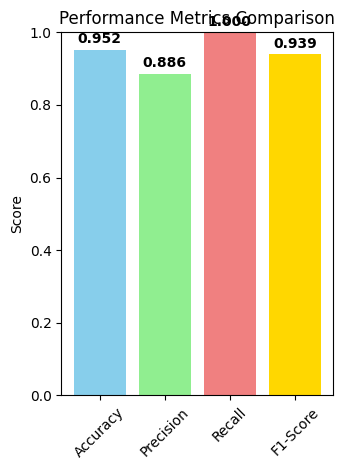

In [12]:
# Metrics comparison
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Calculate metrics for each class
print(f"\nNon-Survivors (Class 0):")
print(f"  True Negatives: {tn}")
print(f"  False Positives: {fp}")
print(f"  Precision (specificity): {tn/(tn+fp):.3f}")
print(f"  → Of predicted non-survivors, {tn/(tn+fp)*100:.1f}% were correct")

print(f"\nSurvivors (Class 1):")
print(f"  True Positives: {tp}")
print(f"  False Negatives: {fn}")
print(f"  Recall (sensitivity): {tp/(tp+fn):.3f}")
print(f"  → We found {tp/(tp+fn)*100:.1f}% of actual survivors")


Non-Survivors (Class 0):
  True Negatives: 49
  False Positives: 4
  Precision (specificity): 0.925
  → Of predicted non-survivors, 92.5% were correct

Survivors (Class 1):
  True Positives: 31
  False Negatives: 0
  Recall (sensitivity): 1.000
  → We found 100.0% of actual survivors


In [14]:
# Error analysis
print(f"\n" + "="*40)
print("ERROR ANALYSIS")
print("="*40)

total_errors = fp + fn
print(f"Total Errors: {total_errors}/{len(y_test)} ({total_errors/len(y_test)*100:.1f}%)")
print(f"Type I Errors (False Positives): {fp} ({fp/total_errors*100:.1f}% of errors)")
print(f"Type II Errors (False Negatives): {fn} ({fn/total_errors*100:.1f}% of errors)")

print(f"\nError Impact:")
if fp > fn:
    print(f"• More False Positives than False Negatives")
    print(f"• Model tends to be optimistic (predicts survival when passengers didn't survive)")
elif fn > fp:
    print(f"• More False Negatives than False Positives")
    print(f"• Model tends to be pessimistic (misses actual survivors)")
else:
    print(f"• Balanced errors between false positives and false negatives")


ERROR ANALYSIS
Total Errors: 4/84 (4.8%)
Type I Errors (False Positives): 4 (100.0% of errors)
Type II Errors (False Negatives): 0 (0.0% of errors)

Error Impact:
• More False Positives than False Negatives
• Model tends to be optimistic (predicts survival when passengers didn't survive)


In [15]:
# Show detailed classification report
print(f"\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

print(f"\n✅ Analysis Complete!")
print(f"Key Takeaway: Accuracy ({accuracy:.1%}) tells us overall performance,")
print(f"but Precision ({precision:.1%}) and Recall ({recall:.1%}) reveal class-specific strengths/weaknesses.")


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

Not Survived       1.00      0.92      0.96        53
    Survived       0.89      1.00      0.94        31

    accuracy                           0.95        84
   macro avg       0.94      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84


✅ Analysis Complete!
Key Takeaway: Accuracy (95.2%) tells us overall performance,
but Precision (88.6%) and Recall (100.0%) reveal class-specific strengths/weaknesses.


# **When is Accuracy Not Enough?**


Accuracy can be misleading in several critical scenarios. Here's why other metrics matter:
1. Imbalanced Datasets
In the Titanic dataset, about 38% survived and 62% died. If our model always predicted "not survived," it would achieve ~62% accuracy but be completely useless. This is why we need:

Precision: Of passengers we predict will survive, how many actually do?
Recall: Of passengers who actually survive, how many do we correctly identify?

2. Different Costs of Errors
False Positives vs False Negatives have different consequences:

False Negative: Predicting someone won't survive when they actually do

Real-world impact: Missing someone who needs rescue resources


False Positive: Predicting someone will survive when they won't

Real-world impact: Wasting limited rescue resources



3. Class-Specific Performance
Accuracy gives us overall correctness but hides class-specific problems:

Our model might be excellent at identifying non-survivors (high specificity)
But terrible at identifying survivors (low sensitivity/recall)
Overall accuracy could still look decent by being right about the majority class

4. Business Requirements
Different applications prioritize different metrics:

Medical diagnosis: High recall is crucial (don't miss sick patients)
Spam detection: High precision matters (don't mark important emails as spam)
Emergency response: Balance depends on resource constraints

5. The Precision-Recall Trade-off

Lowering the prediction threshold increases recall but decreases precision
Accuracy alone doesn't capture this nuanced trade-off
F1-score provides a balanced measure when both precision and recall matter

Key Takeaway
Accuracy is like looking at a forest from airplane - you see the big picture but miss important details. Precision, recall, and F1-score are like walking through the forest - they reveal the nuanced performance for each class and help you understand where your model succeeds and fails.
